Object Detection using OpenCV | Python

In [1]:
import cv2 # pip install opencv-python
import matplotlib.pyplot as plt # pip install matplotlib
import os # pip install os

Use existing config file for model | use one of the configs that has been tested in OpenCV. This choice depends on your model and TensorFlow version

In [3]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb" #tensorflow pre-trained model

In [4]:
model = cv2.dnn_DetectionModel(frozen_model, config_file) #store the models in a variable

In [5]:
classLables = [] #empty list for class labels
file_name = "Labels.txt"
with open(file_name, 'rt') as ftp:
    classLables = ftp.read().rstrip('\n').split('\n')

In [6]:
print(classLables) #prints the list of class 80 labels

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLables))

80


In [8]:
# settings for the input images/videos
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000022012A31AF0>

Read an Image

In [9]:
img = cv2.imread("High_resolution_wallpaper_background_ID_77700245322.jpg")

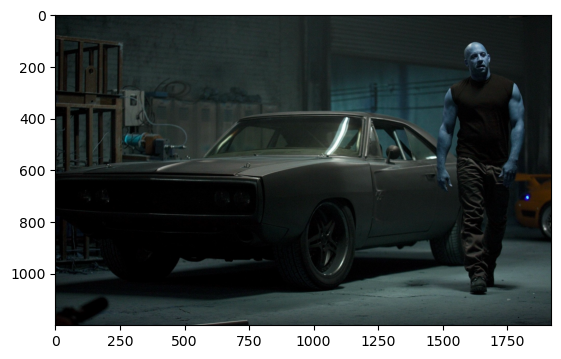

In [10]:
plt.imshow(img) #bgr

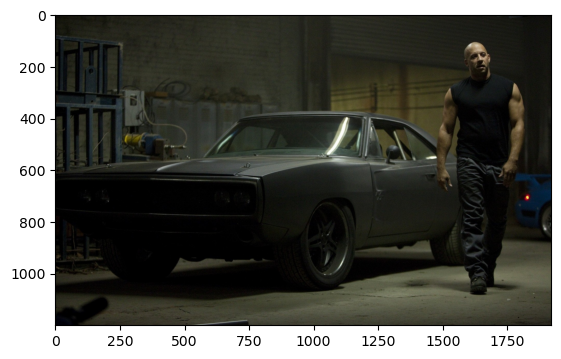

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #convert to rgb

In [12]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [13]:
print(ClassIndex)

[1 3]


In [14]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox): #use zip to iterate through the list
    cv2.rectangle(img, boxes, color=(0, 255, 0), thickness=2)
    cv2.putText(img, classLables[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=2)

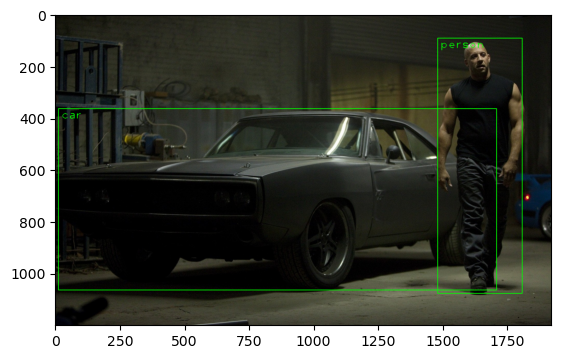

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Video Demo

In [ ]:
import time

cap = cv2.VideoCapture("4K Cape Town Walk 2022 - Downtown - Long Street - Spaziergang [ASMR Non-Stop].mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")

frame_rate = 10000  # Increase or decrease this value to adjust the speed (frames per second)
delay = 1 / frame_rate

font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN  # Font type

while True:
    start_time = time.time()

    ret, frame = cap.read()  # Read the frame by frame from the video

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)  # Detect the objects
    
    print(ClassIndex)
    if len(ClassIndex) != 0:  # Must not be empty and must have a frame
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:  # Removes errors from the list of class labels and avoids crashing
                cv2.rectangle(frame, boxes, color=(0, 255, 0), thickness=2)  # Draw a rectangle in green
                cv2.putText(frame, classLables[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font,
                            fontScale=font_scale, color=(0, 255, 0), thickness=2)
                # Color of the text is green

    cv2.imshow("Object Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    elapsed_time = time.time() - start_time
    if elapsed_time < delay:
        time.sleep(delay - elapsed_time)

cap.release()
cv2.destroyAllWindows()

!['Object_detect_test_Gif.gif'](Object_detect_test_Gif.gif)

Webcam Demo

In [ ]:
cap = cv2.VideoCapture(0) #change this to 0

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam") #changing error instruction

font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN #font type

while True:
    ret, frame = cap.read()

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    print(ClassIndex)
    if (len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd <= 80): # removes errors from the list of class labels and avoids crashing
                cv2.rectangle(frame, boxes, color=(0, 255, 0), thickness=2)
                cv2.putText(frame, classLables[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=2)

    cv2.imshow("Object Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()